<a href="https://colab.research.google.com/github/Darianna-dev/TelecomX-ONE-challenge/blob/main/TelecomX_LATAM_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [94]:
datos = pd.read_json('/content/drive/MyDrive/ALURA LATAM (ONE)/CHALLENGE-TELECOM-X/Archivos_TelecomX/TelecomX_Data.json')
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [95]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [96]:
# Aplanamos cada columna de diccionrio
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

In [97]:
datos = pd.concat([datos[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [98]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [99]:
datos['Charges.Total'] = datos['Charges.Total'].replace(' ', np.nan) # se reemplaza los espacios en blanco con NaN
datos['Charges.Total'] = pd.to_numeric(datos['Charges.Total'], errors='coerce') # se convierte la columna 'Charges.Total' a numérica.
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [100]:
# Ver cantidad de valores nulos por columna
datos.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [101]:
datos.isnull().sum() * 100 /len(datos)

,0
customerID,0.000000
Churn,0.000000
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000


In [102]:
datos.dropna(inplace=True)
datos.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [103]:
# Ver número de filas duplicadas
datos.duplicated().sum()

np.int64(0)

In [104]:
datos['customerID'].duplicated().sum()

np.int64(0)

In [105]:
print("Clientes duplicados:", datos.duplicated(subset=['customerID']).sum())

Clientes duplicados: 0


In [106]:
datos['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [107]:
# Limpiar espacios al inicio y al final
datos['Contract'] = datos['Contract'].str.strip()

In [108]:
# Convertir a minúsculas
datos['Contract'] = datos['Contract'].str.lower().str.replace('month-to-month', 'month_to_month').str.replace('one year','one_year').str.replace('two year','two_year')
datos['Contract']

,Contract
0,one_year
1,month_to_month
2,month_to_month
3,month_to_month
4,month_to_month
...,...
7262,one_year
7263,month_to_month
7264,month_to_month
7265,two_year


In [109]:
datos.sample(4)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
3962,5419-CONWX,Yes,Female,1,No,No,4,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,month_to_month,Yes,Credit card (automatic),99.80,442.85
5838,7989-AWGEH,No,Male,0,Yes,Yes,49,No,No phone service,DSL,...,No,No,No,No,Yes,month_to_month,Yes,Electronic check,39.20,1838.15
1057,1480-BKXGA,No,Male,1,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,two_year,Yes,Bank transfer (automatic),116.05,8404.90
5609,7663-CUXZB,No,Male,0,Yes,No,59,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,two_year,No,Electronic check,113.75,6561.25


In [110]:
for col in datos.select_dtypes(include='object').columns:
    datos[col] = datos[col].str.strip().str.title()
    print(f"Unique values in '{col}':")
    print(datos[col].unique())
    print('---')

Unique values in 'customerID':
['0002-Orfbo' '0003-Mknfe' '0004-Tlhlj' ... '9992-Ujoel' '9993-Lhieb'
 '9995-Hotoh']
---
Unique values in 'Churn':
['No' 'Yes' '']
---
Unique values in 'gender':
['Female' 'Male']
---
Unique values in 'Partner':
['Yes' 'No']
---
Unique values in 'Dependents':
['Yes' 'No']
---
Unique values in 'PhoneService':
['Yes' 'No']
---
Unique values in 'MultipleLines':
['No' 'Yes' 'No Phone Service']
---
Unique values in 'InternetService':
['Dsl' 'Fiber Optic' 'No']
---
Unique values in 'OnlineSecurity':
['No' 'Yes' 'No Internet Service']
---
Unique values in 'OnlineBackup':
['Yes' 'No' 'No Internet Service']
---
Unique values in 'DeviceProtection':
['No' 'Yes' 'No Internet Service']
---
Unique values in 'TechSupport':
['Yes' 'No' 'No Internet Service']
---
Unique values in 'StreamingTV':
['Yes' 'No' 'No Internet Service']
---
Unique values in 'StreamingMovies':
['No' 'Yes' 'No Internet Service']
---
Unique values in 'Contract':
['One_Year' 'Month_To_Month' 'Two_Yea

In [111]:
datos['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [112]:
# 2. Reemplazar cadenas vacías y espacios en blanco con NaN
datos['Churn'] = datos['Churn'].replace(r'^\s*$', float('NaN'), regex=True)

In [113]:
# 3. Eliminar filas donde Churn es NaN (es decir, eran vacíos o espacios)
datos = datos[datos['Churn'].notnull()].copy()
datos['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [114]:
# 4. Resetear el índice
datos.reset_index(drop=True, inplace=True)

In [115]:
print(datos['Churn'].value_counts(dropna=False))

Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [116]:
# Se convierten los nombres de las columnas a minusculas
datos.columns = datos.columns.str.strip().str.lower().str.replace('.', '_').str.replace(' ', '_')
datos.head(3)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
0,0002-Orfbo,No,Female,0,Yes,Yes,9,Yes,No,Dsl,...,Yes,No,Yes,Yes,No,One_Year,Yes,Mailed Check,65.6,593.30
1,0003-Mknfe,No,Male,0,No,No,9,Yes,Yes,Dsl,...,No,No,No,No,Yes,Month_To_Month,No,Mailed Check,59.9,542.40
2,0004-Tlhlj,Yes,Male,0,No,No,4,Yes,No,Fiber Optic,...,No,Yes,No,No,No,Month_To_Month,Yes,Electronic Check,73.9,280.85


In [117]:
# Convertir tenure (meses) a días aproximados
datos['tenure_days'] = datos['tenure'] * 30

In [118]:
datos['cuentas_diarias'] = datos['charges_monthly'] / 30
datos.sample(5)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,tenure_days,cuentas_diarias
4217,5965-Ggprw,No,Male,0,Yes,Yes,72,Yes,Yes,Fiber Optic,...,No,Yes,Yes,Two_Year,No,Bank Transfer (Automatic),105.25,7609.75,2160,3.508333
311,0461-Cvkmu,Yes,Female,0,Yes,Yes,23,Yes,No,Fiber Optic,...,Yes,No,No,Month_To_Month,No,Electronic Check,83.80,1900.25,690,2.793333
6061,8606-Oegqz,No,Female,0,No,Yes,18,Yes,Yes,No,...,No Internet Service,No Internet Service,No Internet Service,Two_Year,No,Credit Card (Automatic),25.30,454.65,540,0.843333
2010,2904-Gguaz,No,Female,0,Yes,No,72,Yes,Yes,Fiber Optic,...,No,No,No,Two_Year,Yes,Bank Transfer (Automatic),84.05,6052.25,2160,2.801667
2021,2921-Xwdjh,No,Female,1,Yes,No,38,Yes,No,Fiber Optic,...,No,No,Yes,Month_To_Month,Yes,Electronic Check,83.45,3147.15,1140,2.781667


In [119]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   seniorcitizen     7032 non-null   int64  
 4   partner           7032 non-null   object 
 5   dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   object 
 8   multiplelines     7032 non-null   object 
 9   internetservice   7032 non-null   object 
 10  onlinesecurity    7032 non-null   object 
 11  onlinebackup      7032 non-null   object 
 12  deviceprotection  7032 non-null   object 
 13  techsupport       7032 non-null   object 
 14  streamingtv       7032 non-null   object 
 15  streamingmovies   7032 non-null   object 
 16  contract          7032 non-null   object 


In [120]:
datos.cuentas_diarias.isnull().sum()

np.int64(0)

In [121]:
datos.cuentas_diarias.isna().sum()

np.int64(0)

In [122]:
datos.replace("No Phone Service", "No", inplace=True)
datos.replace("No Internet Service", "No", inplace=True)

In [123]:
datos.sample(5)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,tenure_days,cuentas_diarias
6716,9553-Dlclu,No,Female,0,No,Yes,13,Yes,Yes,Dsl,...,Yes,Yes,Yes,Two_Year,No,Credit Card (Automatic),88.95,1161.75,390,2.965000
1764,2581-Vkirt,No,Female,0,Yes,Yes,59,Yes,Yes,Dsl,...,Yes,No,No,One_Year,No,Mailed Check,65.50,3801.30,1770,2.183333
4706,6646-Qvxlr,Yes,Male,1,Yes,No,62,Yes,Yes,Fiber Optic,...,No,Yes,Yes,One_Year,Yes,Electronic Check,103.75,6383.35,1860,3.458333
710,1047-Nncbf,No,Male,0,No,No,20,Yes,No,Fiber Optic,...,No,No,No,Month_To_Month,No,Credit Card (Automatic),70.55,1493.55,600,2.351667
266,0396-Ukgai,No,Male,0,No,Yes,23,Yes,No,Dsl,...,Yes,No,No,Month_To_Month,Yes,Bank Transfer (Automatic),55.30,1284.20,690,1.843333


In [124]:
datos.partner.unique()

array(['Yes', 'No'], dtype=object)

In [125]:
datos.columns

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges_monthly', 'charges_total',
       'tenure_days', 'cuentas_diarias'],
      dtype='object')

In [126]:
# Diccionario de mapeo
mapeo = {'Yes': 1, 'No': 0}

# Aplicar a columnas relevantes
cols_a_binarias = ['partner', 'dependents', 'phoneservice', 'multiplelines', 'onlinesecurity',
                   'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']

for col in cols_a_binarias:
    if col in datos.columns and datos[col].dtype == 'object':
        # datos.loc[:, col] = datos[col].map(mapeo)
        datos[col] = datos[col].map(mapeo)

In [127]:
datos.sample(5)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,tenure_days,cuentas_diarias
4501,6358-Lyngm,Yes,Male,0,0,0,1,1,1,Fiber Optic,...,0,0,0,Month_To_Month,Yes,Electronic Check,74.90,74.90,30,2.496667
2999,4302-Zyfel,No,Male,0,1,1,69,1,0,No,...,0,0,0,One_Year,Yes,Credit Card (Automatic),20.55,1403.10,2070,0.685000
5126,7233-Ioqnp,No,Female,0,1,0,43,0,0,Dsl,...,1,0,0,Month_To_Month,No,Bank Transfer (Automatic),34.00,1505.35,1290,1.133333
1582,2307-Fynnl,No,Male,1,0,0,65,1,1,Fiber Optic,...,1,1,1,Two_Year,Yes,Electronic Check,109.05,7108.20,1950,3.635000
2090,3003-Cmduu,No,Female,0,1,0,25,1,0,Fiber Optic,...,1,1,1,Month_To_Month,Yes,Electronic Check,95.15,2395.70,750,3.171667


#📊 Carga y análisis

In [128]:
datos.describe()

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,charges_monthly,charges_total,tenure_days,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,64.798208,2283.300441,972.653584,2.159940
std,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,30.085974,2266.771362,736.357791,1.002866
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,30.000000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,270.000000,1.186250
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.350000,1397.475000,870.000000,2.345000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,1650.000000,2.995417
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,2160.000000,3.958333


In [129]:
churn_counts = datos['churn'].value_counts()
print(churn_counts)

churn
No     5163
Yes    1869
Name: count, dtype: int64


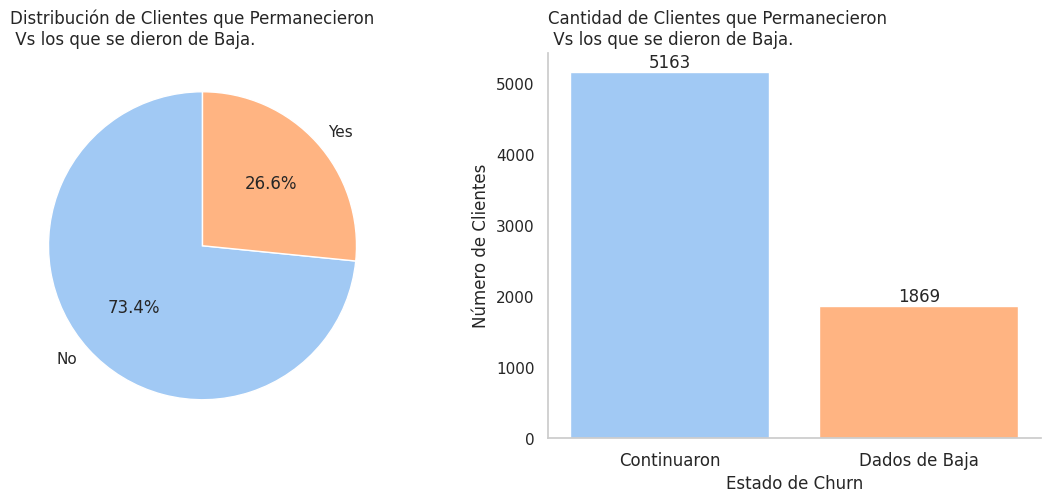

In [130]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(1,2, figsize=(14, 5))

# Primer Gráfico de Pie
ax[0].pie(
    churn_counts.values,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel"),
    # wedgeprops=dict(width=0.5)
)
ax[0].set_title('Distribución de Clientes que Permanecieron\n Vs los que se dieron de Baja.',
                loc='left')


# Segudo Gráfico de Barras
ax[1].bar(x=churn_counts.index, height=churn_counts.values, color=sns.color_palette("pastel"))
ax[1].set_title('Cantidad de Clientes que Permanecieron\n Vs los que se dieron de Baja.', loc='left')
ax[1].set_xlabel('Estado de Churn')
ax[1].set_ylabel('Número de Clientes')


ax[1].xaxis.set_tick_params(labelsize=12)
ax[1].xaxis.set_tick_params(labelsize=12)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
# ax[1].spines['bottom'].set_visible(False)
# ax[1].spines['left'].set_visible(False)

ax[1].grid()
ax[1].set_xticks([0, 1], ['Continuaron', 'Dados de Baja'])

for i, value in enumerate(churn_counts.values):
    ax[1].text(i, value + 50, str(value), ha='center', fontsize=12)

plt.show()

In [142]:
datos.sample(5)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,tenure_days,cuentas_diarias
1150,1697-Bcshv,No,Female,0,1,1,58,1,1,Dsl,...,0,1,0,Month_To_Month,Yes,Bank Transfer (Automatic),66.80,3970.40,1740,2.226667
2473,3547-Lqrik,No,Female,0,1,0,47,1,1,No,...,0,0,0,One_Year,No,Electronic Check,26.90,1250.85,1410,0.896667
586,0864-Fvjnj,No,Female,0,1,1,64,1,1,Fiber Optic,...,1,1,1,One_Year,No,Electronic Check,113.35,7222.75,1920,3.778333
3247,4656-Caurt,No,Male,0,0,0,69,1,1,No,...,0,0,0,Two_Year,No,Bank Transfer (Automatic),23.95,1713.10,2070,0.798333
1768,2587-Ekxts,No,Male,0,0,0,44,1,1,Fiber Optic,...,0,1,1,Month_To_Month,Yes,Electronic Check,111.50,4915.15,1320,3.716667


In [132]:
def plot_churn_by_category(datos, var_categorica):
    """
    Grafica el porcentaje de churn por categoría.
    """
    grouped = datos.groupby(var_categorica)['churn'].value_counts(normalize=True).unstack().fillna(0)
    ax = grouped.plot(kind='bar', stacked=True, figsize=(10,5), color=sns.color_palette("pastel"))

    plt.title(f'Churn por {var_categorica}', fontsize=14)
    plt.xlabel(var_categorica, fontsize=12)
    plt.ylabel('Proporción de clientes', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(['No se fueron', 'Se fueron'])

    # Mostrar porcentajes en las barras
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%.1f%%')

    plt.tight_layout()
    plt.show()

In [133]:
def plot_grouped_churn(datos, category):
    # Preparar datos
    churn_data = datos.groupby([category, 'churn']).size().unstack(fill_value=0)

    # Graficar
    ax = churn_data.plot(kind='bar', figsize=(10, 5), color=sns.color_palette("pastel"))

    # Títulos y etiquetas
    plt.title(f'Churn por {category} (Barras Agrupadas)')
    plt.xlabel(category)
    plt.ylabel('Número de clientes')
    plt.xticks(rotation=0)
    plt.legend(['No se fueron', 'Se fueron'])
    plt.tight_layout()

    # Mostrar valores encima de cada barra
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

    plt.show()

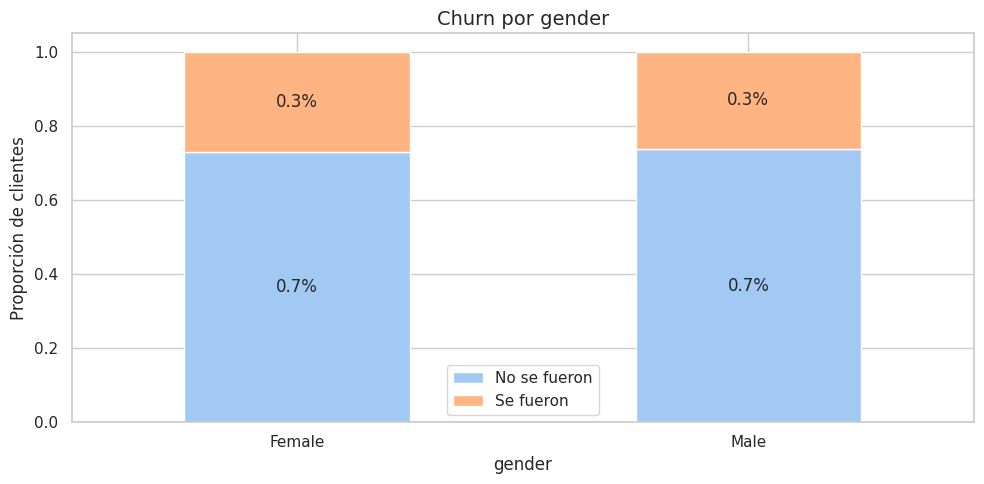

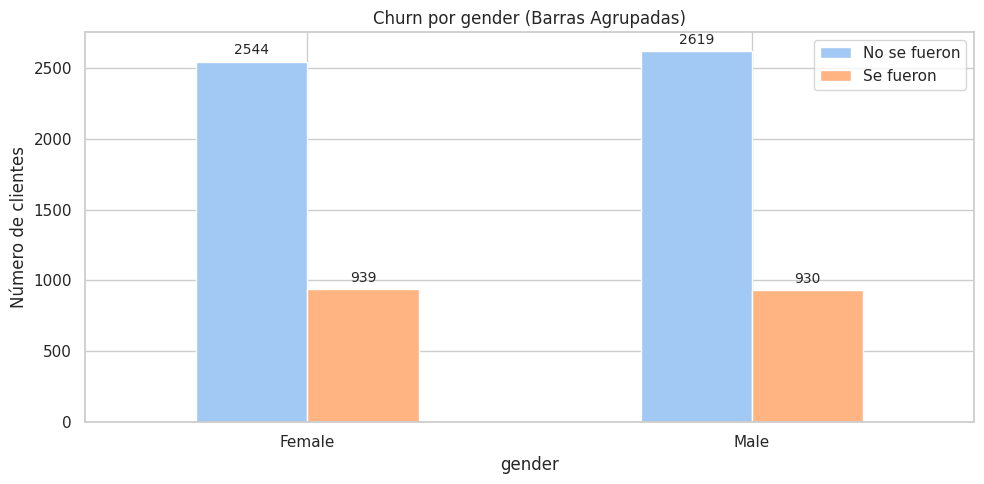

In [134]:
# gráfico por Género
plot_churn_by_category(datos, 'gender')
plot_grouped_churn(datos, 'gender')

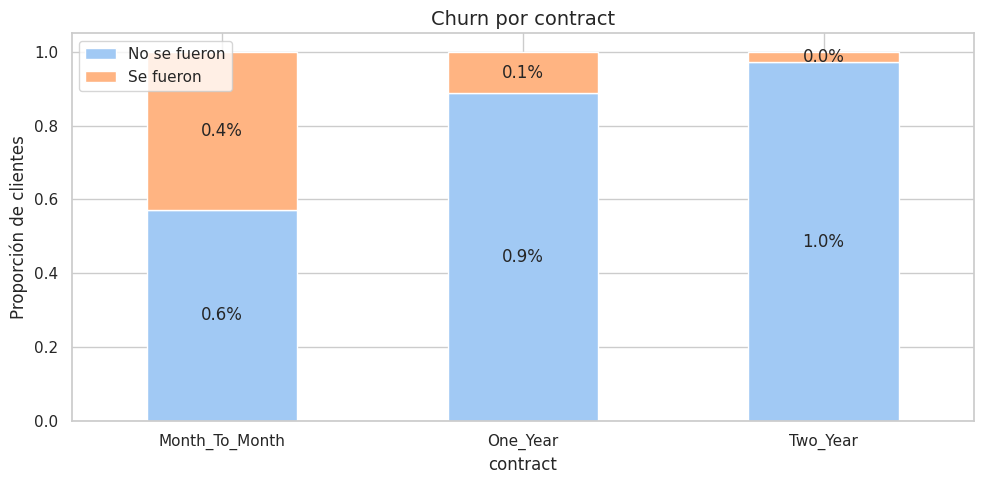

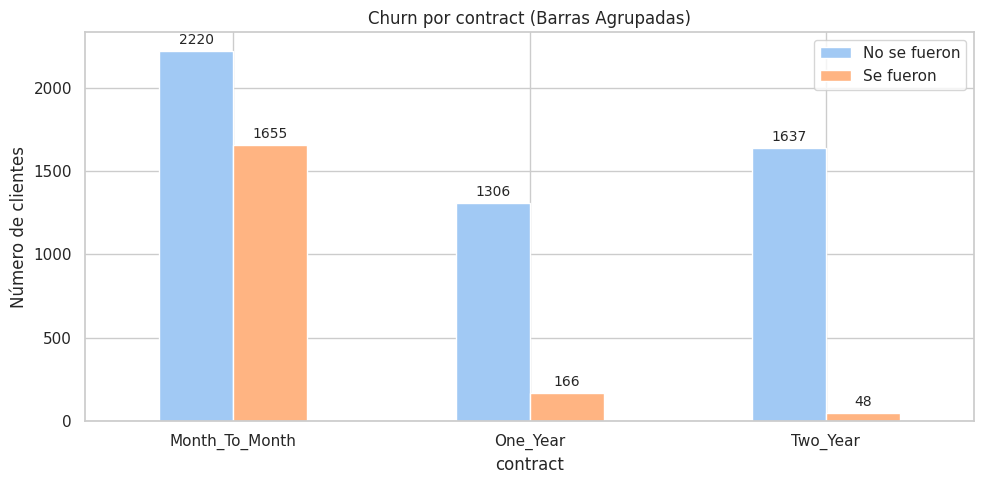

In [135]:
# Gráfico Por Tipo de Contrato
plot_churn_by_category(datos, 'contract')
plot_grouped_churn(datos, 'contract')

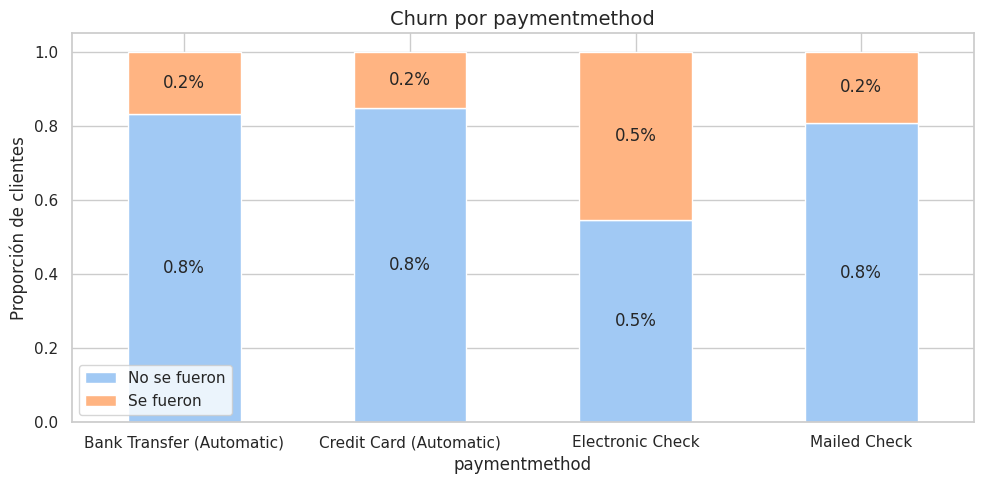

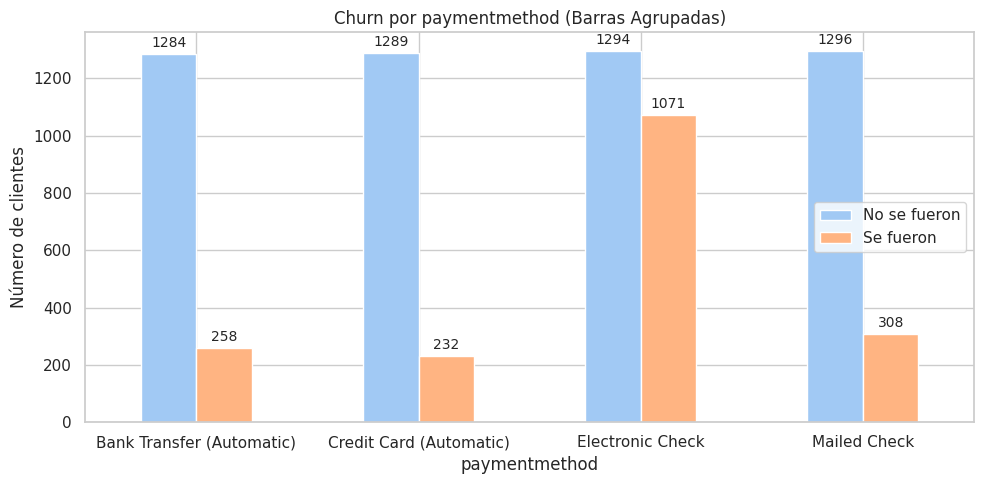

In [136]:
# gRÁFICA POR mÉTODO DE pAGO
plot_churn_by_category(datos, 'paymentmethod')
plot_grouped_churn(datos, 'paymentmethod')

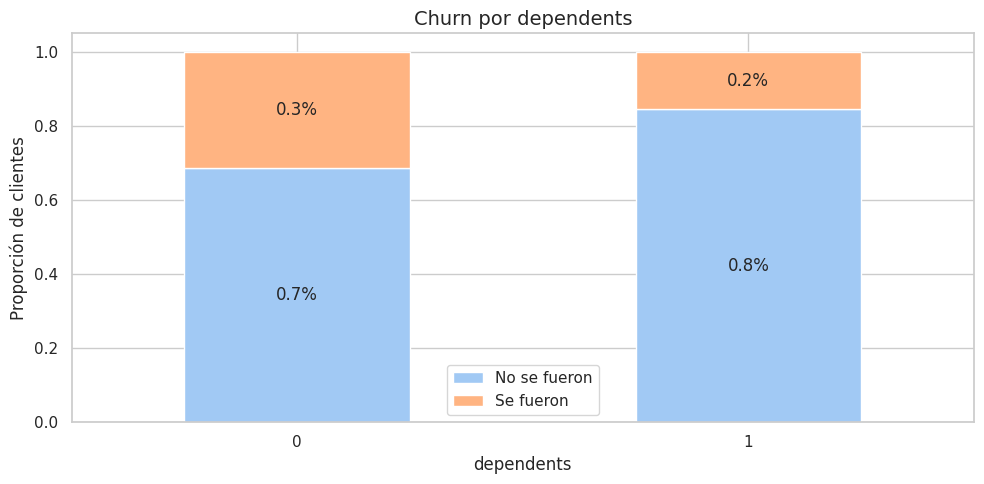

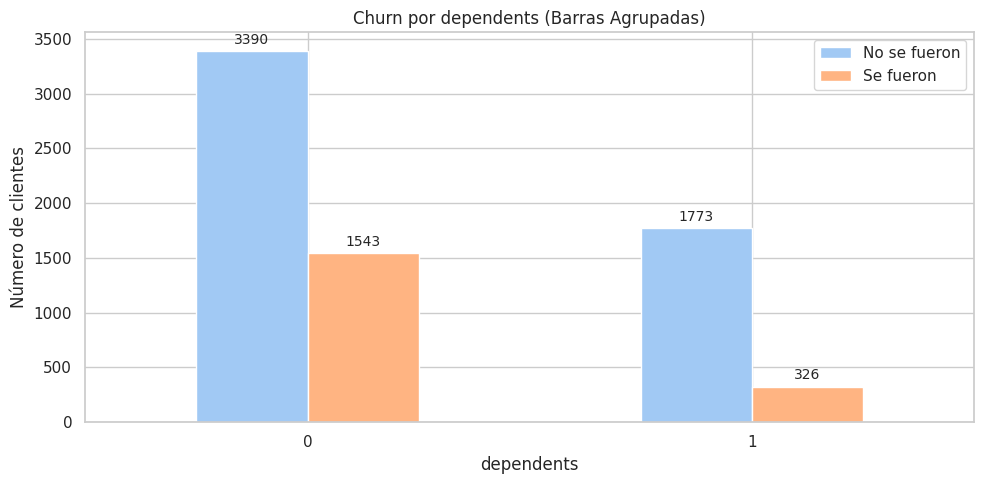

In [137]:
plot_churn_by_category(datos, 'dependents')
plot_grouped_churn(datos, 'dependents')

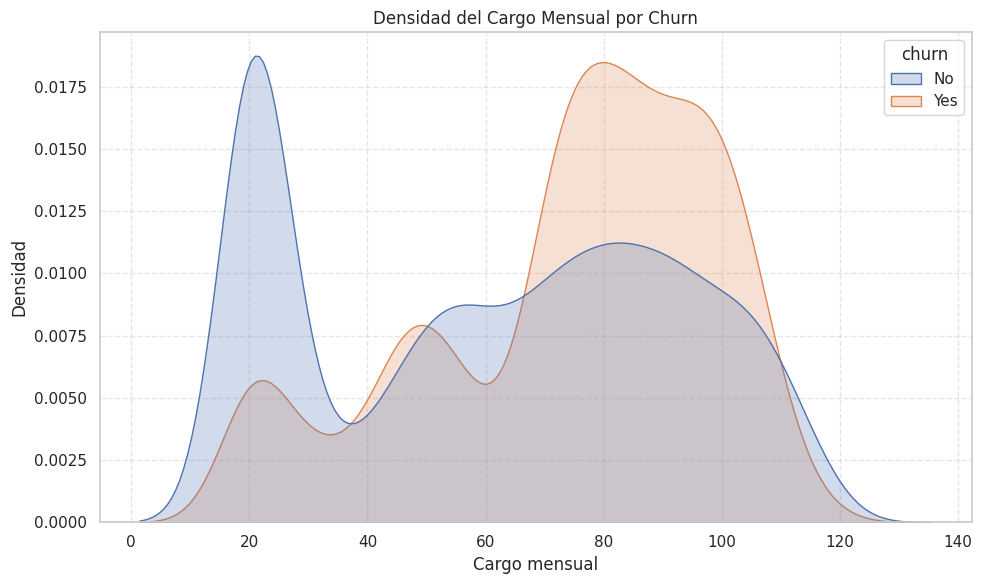

In [138]:
plt.figure(figsize=(10, 6))
sns.kdeplot(datos, x='charges_monthly', hue='churn', fill=True, common_norm=False)
plt.title('Densidad del Cargo Mensual por Churn')
plt.xlabel('Cargo mensual')
plt.ylabel('Densidad')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [139]:
numeric_vars = ['tenure', 'charges_monthly', 'charges_total', 'tenure_days']

for var in numeric_vars:
    print(f"\n{'-'*50}")
    print(f"Comparación de '{var}' vs Churn")
    print(datos.groupby('churn')[var].agg(['mean', 'median', 'std', 'count']))




--------------------------------------------------
Comparación de 'tenure' vs Churn
            mean  median        std  count
churn                                     
No     37.650010    38.0  24.076940   5163
Yes    17.979133    10.0  19.531123   1869

--------------------------------------------------
Comparación de 'charges_monthly' vs Churn
            mean  median        std  count
churn                                     
No     61.307408   64.45  31.094557   5163
Yes    74.441332   79.65  24.666053   1869

--------------------------------------------------
Comparación de 'charges_total' vs Churn
              mean   median          std  count
churn                                          
No     2555.344141  1683.60  2329.456984   5163
Yes    1531.796094   703.55  1890.822994   1869

--------------------------------------------------
Comparación de 'tenure_days' vs Churn
              mean  median         std  count
churn                                        
No     1129

In [140]:
# for var in numeric_vars:
#   print(f"\n{'-'*50}")
#   print(f"Comparación de '{var}' vs Churn")
#   print(datos[var].describe())

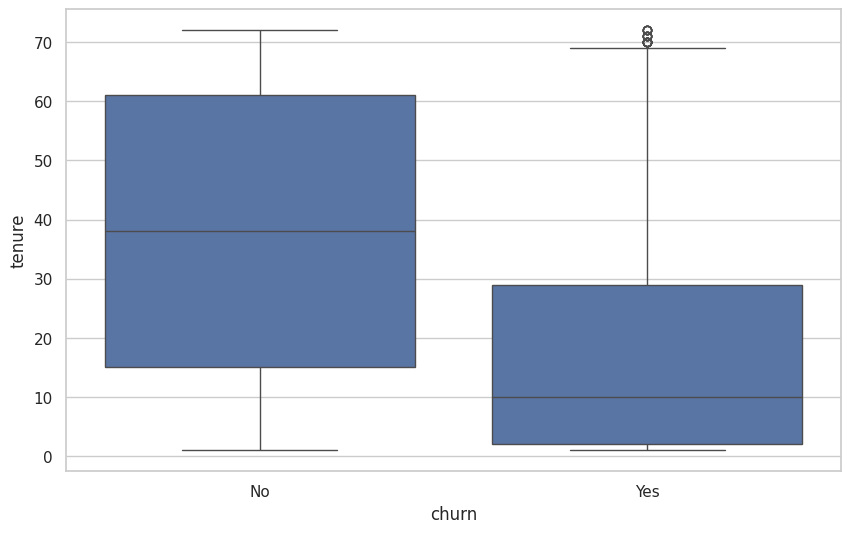

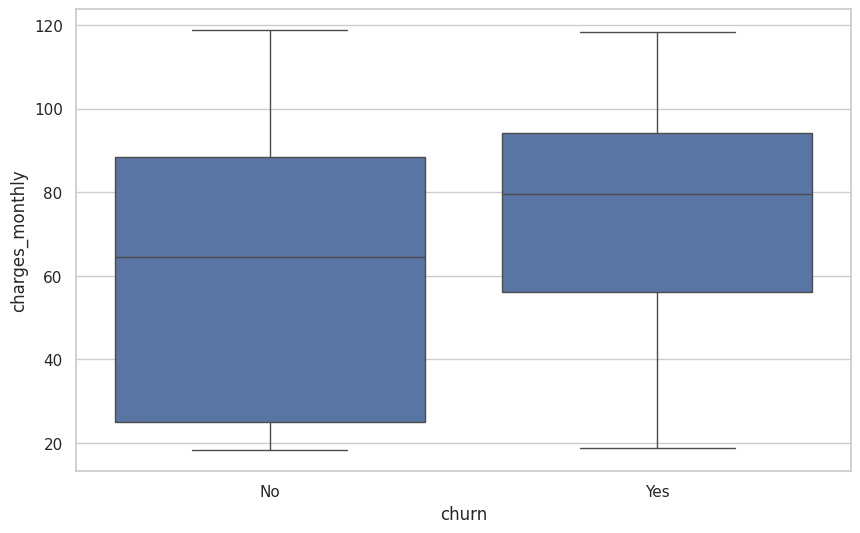

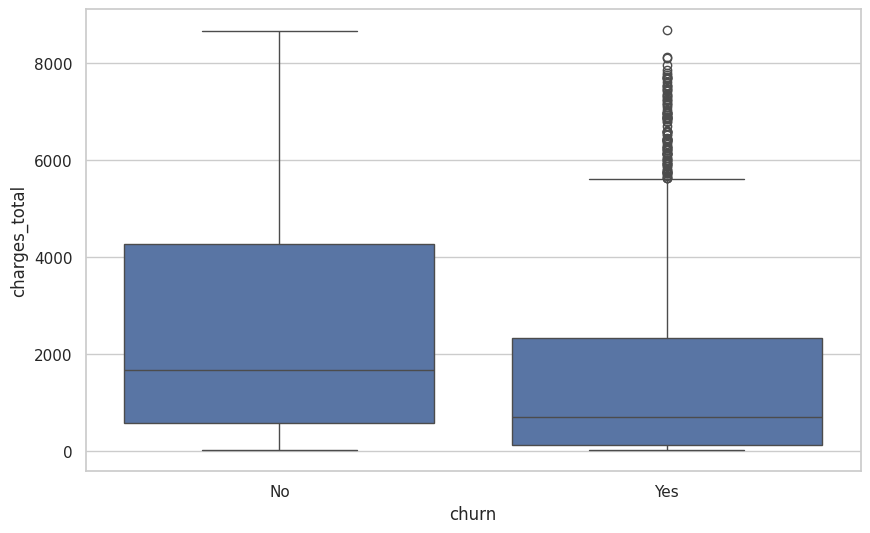

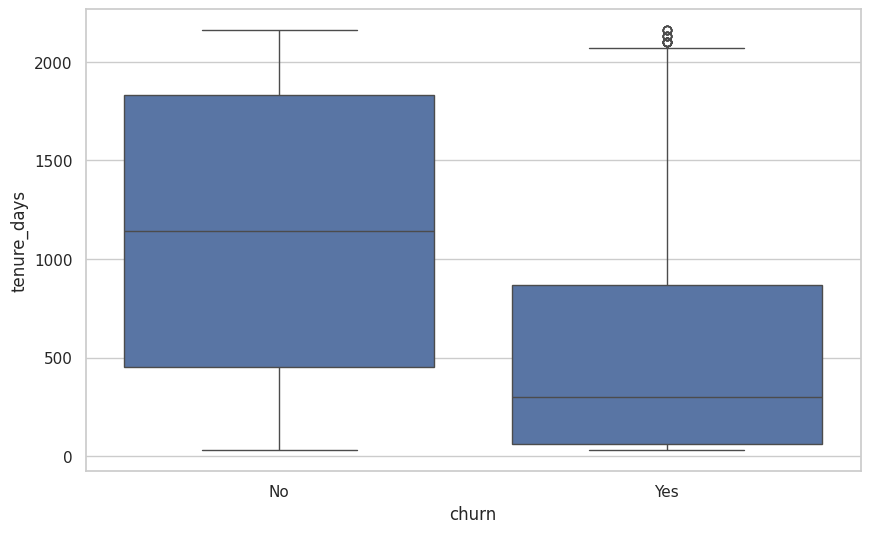

In [141]:
for variable in numeric_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='churn', y=variable, data=datos)
    print(f"\n")

#📄Informe final

##  🔍 1. Introducción

Este análisis busca identificar los patrones que explican el abandono de clientes (churn) en el sector de telecomunicaciones.
El churn representa una amenaza clave para la retención, al reflejar la pérdida de usuarios activos.
Detectar los factores asociados permite tomar decisiones informadas.
Esto facilita mejorar la experiencia del cliente y reducir la rotación.

## 🧹 2. Limpieza y Tratamiento de Datos

Se cargaron los datos desde un archivo .json (TelecomX_Data.json) usando pandas. Las variables incluyen información demográfica, servicios contratados, duración del contrato y cargos mensuales y totales entre otros.

🧺 Pasos de limpieza realizados:

- Se Aplanó cada columna del diccionrio.
- Se convirtieron variables categóricas a tipo category.
- Se creó una variable binaria llamada "cols_a_binarias"  para facilitar cálculos posteriores ('Yes' → 1, 'No' → 0).
- Se verificó la ausencia de valores nulos.
- Se trató datos duplicados.

## 📈 Variables numéricas procesadas:


- tenure: Meses con la compañía.
- charges_monthly: Cargo mensual.
- charges_total: Total acumulado pagado.
- tenure_days: Tiempo en días (derivado).
- cuentas_diarias: Para calcular el valor diario.

## 📊 3. Análisis Exploratorio de Datos


### 📌 Distribución general del Churn

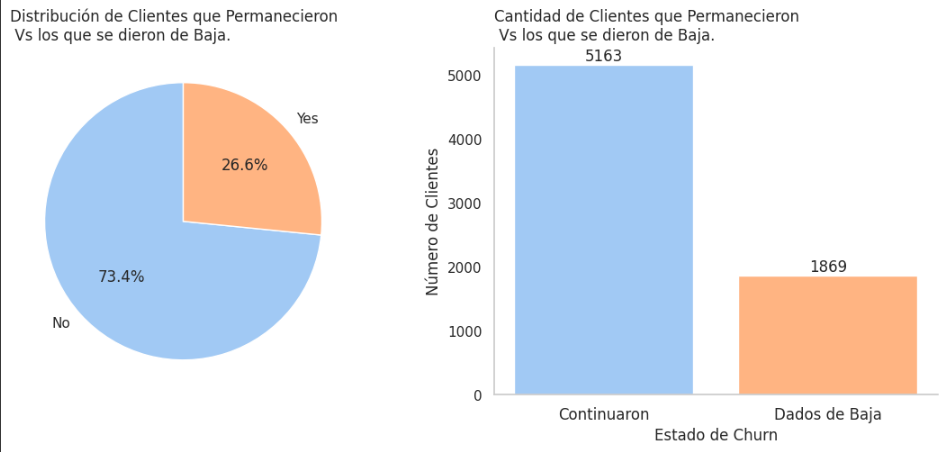

### 📃📈 **Análisis:** Un 26.6% de los clientes analizados han abandonado el servicio.

## 📌 Relación entre Churn y variables categóricas


### 📌📌 Por tipo de contrato:

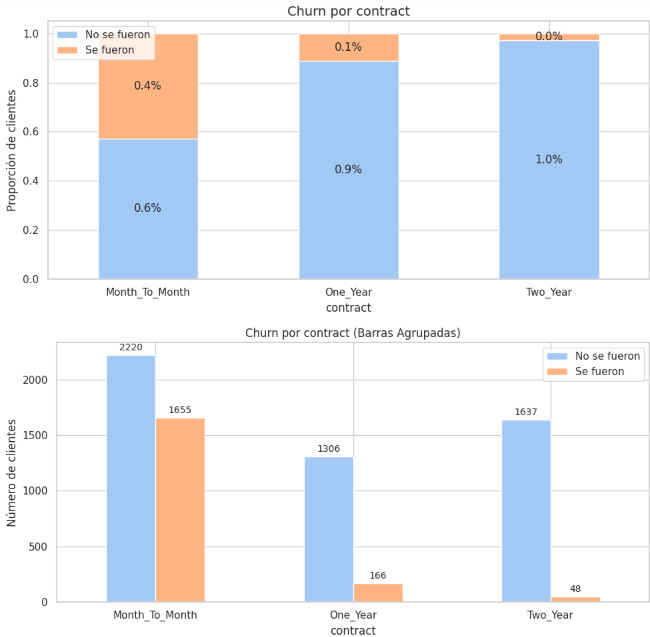

### 📃📈 Análisis:  Los clientes con contrato mensual tienen una tasa de abandono mucho mayor que quienes tienen contratos anuales o bienales.

## 📝 4. Conclusiones e Insights

### 📌 Principales hallazgos:

### 1. Los contratos mensuales tienen mayor churn.
- Indican menor compromiso por parte del cliente.
- Representa un grupo prioritario para acciones de fidelización.


### 2. Clientes nuevos tienden a irse antes.
- Baja tenure está correlacionada con abandono temprano.
- Requiere atención durante las primeras semanas/meses.

### 3. Altos cargos mensuales sin valor percibido aumentan el riesgo de churn.
- Puede ser un síntoma de mala percepción del servicio o falta de personalización.

### 4. Método de pago automático reduce el abandono.
- Facilita la continuidad del servicio.
- Puede usarse como incentivo para fidelizar.


## 🚀 5. Recomendaciones

### 1. Ofrecer descuentos por contratos anuales o bienales
- Incentivar el cambio de contrato mensual a largo plazo.
- Ejemplo: regalo de meses adicionales o bonificaciones.

### 2. Programa de onboarding para nuevos clientes
- Mejorar la primera experiencia para reducir abandono temprano.
- Ofrecer guías, soporte técnico inicial o beneficios iniciales.

### 3. Segmentación por gasto mensual
- Ofrecer planes alternativos o paquetes premium a clientes de alto valor.
- Personalizar ofertas para evitar que clientes de alto costo se vayan.

### 4. Promoción de pago automático
- Beneficios exclusivos para clientes con pago automático (ej. descuentos, acceso a contenido adicional).

### 5. Monitoreo proactivo de clientes de alto riesgo
- Implementar modelos predictivos para identificar clientes con alta probabilidad de abandonar.
- Contactarlos antes de que tomen la decisión final.

## ✅ Conclusión


  Este análisis exploratorio ha permitido identificar patrones claros que explican el comportamiento de los clientes frente al abandono. Con esta información, se pueden diseñar estrategias efectivas para disminuir el churn , incrementar la retención y mejorar la rentabilidad a largo plazo.